In [29]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# Load the dataset
diabetics = load_diabetes()

cols_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data, columns=cols_name)


new_df = df_diabetics.drop(columns=['age', 'sex', 's1', 's2', 's3', 's4', 's5', 's6'])
print(df_diabetics)


#create a function to find outliers using IQR
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1)]

   return outliers 

outliers = find_outliers_IQR(new_df)
outliers = list(outliers.index)
# outliers_bp = find_outliers_IQR(df_diabetics['bp'])
# print(list(outliers.index))


          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

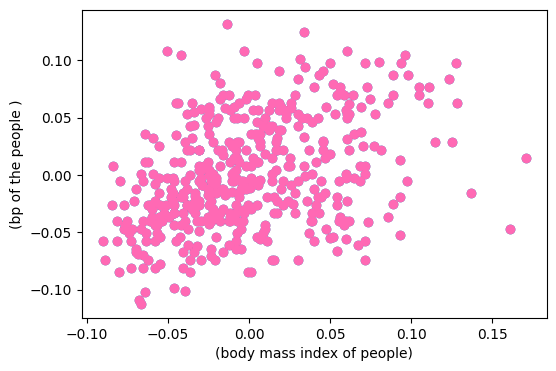

In [25]:
x, y = df_diabetics['bmi'], df_diabetics['bp']

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y)
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.scatter(x, y, color = 'hotpink')
plt.show()


(array([ 32, 145, 256, 262, 366, 367, 405]),)


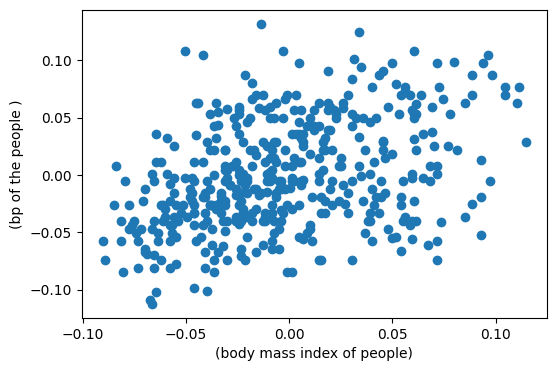

In [26]:
# Detection outliers
outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))
print(outlier_indices)

# Remove outliers
df_diabetics_no_outliers = df_diabetics.drop(outlier_indices[0])

# Visualization df without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(df_diabetics_no_outliers['bmi'], df_diabetics_no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()

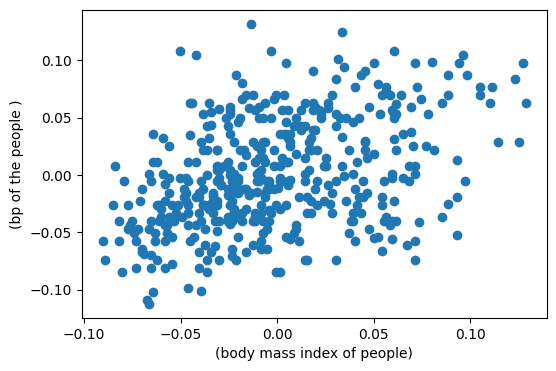

In [27]:
# Remove outliers
df_diabetics_no_outliers = df_diabetics.drop(outliers)

# Visualization df without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(df_diabetics_no_outliers['bmi'], df_diabetics_no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()